# Модуль 3. Выявление зависимостей в данных

In [165]:
# "стандартный" импорт
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import seaborn as sns

### 0. Предисловие
Для продолжения работы загружаю датасеты, которые у меня получились в ходе работы над модулями 1-2. Здесь ничего нового и можно переходить к п.1, где и начинается выполнение задания

In [185]:
# грузим train_m2.csv
try:
    train_orig = pd.read_csv('train_m2.csv')
except FileNotFoundError:
    print('Файл train_m2.csv отсутствует')
except Exception as e:
    print(f'Возникла ошибка {e.args[1]}')

In [3]:
train_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20125605 entries, 0 to 20125604
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   obj_id         float64
 1   counter        float64
 2   datetime       object 
 3   value          float64
 4   city           int64  
 5   function       float64
 6   square         float64
 7   year           float64
 8   temp           float64
 9   clouds         float64
 10  dew            float64
 11  precipitation  float64
 12  pressure       float64
 13  wdirection     float64
 14  wspeed         float64
dtypes: float64(13), int64(1), object(1)
memory usage: 3.5 GB


Сразу сжимаю данные по выясненным ранее критериям

In [186]:
# задаём верный тип для дата/времени
train_orig.datetime = pd.to_datetime(train_orig.datetime)

In [187]:
# Сжимаем obj_id и counter
train_orig.obj_id = train_orig.obj_id.astype(np.ushort)
train_orig.counter = train_orig.counter.astype(np.uint8)
# сжимаем city
train_orig.city = train_orig.city.astype(np.uint8)
# сжимаем function
train_orig.function = train_orig.function.astype(np.uint8)
# сжимаем clouds
train_orig.clouds = train_orig.clouds.astype(np.uint8)
# для экономии памяти сожмём float64 до float32?
for col in ['temp', 'dew', 'pressure', 'wdirection', 'wspeed', 'precipitation', 'value', 'square']:
    train_orig[col] = train_orig[col].astype(np.float32)
# сжимаем year
train_orig.year = train_orig.year.astype(np.ushort)

In [6]:
train_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20125605 entries, 0 to 20125604
Data columns (total 15 columns):
 #   Column         Dtype         
---  ------         -----         
 0   obj_id         uint16        
 1   counter        uint8         
 2   datetime       datetime64[ns]
 3   value          float32       
 4   city           uint8         
 5   function       uint8         
 6   square         float32       
 7   year           uint16        
 8   temp           float32       
 9   clouds         uint8         
 10  dew            float32       
 11  precipitation  float32       
 12  pressure       float32       
 13  wdirection     float32       
 14  wspeed         float32       
dtypes: datetime64[ns](1), float32(8), uint16(2), uint8(4)
memory usage: 921.3 MB


In [87]:
# грузим test_m2.csv
try:
    test_orig = pd.read_csv('test_m2.csv', nrows=10000)
except FileNotFoundError:
    print('Файл test_m2.csv отсутствует')
except Exception as e:
    print(f'Возникла ошибка {e.args[1]}')

In [8]:
test_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   obj_id         10000 non-null  int64  
 1   counter        10000 non-null  int64  
 2   datetime       10000 non-null  object 
 3   city           10000 non-null  int64  
 4   function       10000 non-null  int64  
 5   square         10000 non-null  int64  
 6   year           10000 non-null  int64  
 7   temp           10000 non-null  float64
 8   clouds         10000 non-null  float64
 9   dew            10000 non-null  float64
 10  precipitation  10000 non-null  float64
 11  pressure       10000 non-null  float64
 12  wdirection     10000 non-null  float64
 13  wspeed         10000 non-null  float64
dtypes: float64(7), int64(6), object(1)
memory usage: 1.7 MB


Cжимаю данные по выясненным ранее критериям

In [88]:
# задаём верный тип для дата/времени
test_orig.datetime = pd.to_datetime(test_orig.datetime)

# Сжимаем obj_id и counter
test_orig.obj_id = test_orig.obj_id.astype(np.ushort)
test_orig.counter = test_orig.counter.astype(np.uint8)
# сжимаем city
test_orig.city = test_orig.city.astype(np.uint8)
# сжимаем function
test_orig.function = test_orig.function.astype(np.uint8)
# сжимаем clouds
test_orig.clouds = test_orig.clouds.astype(np.uint8)
# для экономии памяти сожмём float64 до float32?
for col in ['temp', 'dew', 'pressure', 'wdirection', 'wspeed', 'precipitation', 'square']:
    test_orig[col] = test_orig[col].astype(np.float32)
# сжимаем year
test_orig.year = test_orig.year.astype(np.ushort)

In [10]:
test_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   obj_id         10000 non-null  uint16        
 1   counter        10000 non-null  uint8         
 2   datetime       10000 non-null  datetime64[ns]
 3   city           10000 non-null  uint8         
 4   function       10000 non-null  uint8         
 5   square         10000 non-null  float32       
 6   year           10000 non-null  uint16        
 7   temp           10000 non-null  float32       
 8   clouds         10000 non-null  uint8         
 9   dew            10000 non-null  float32       
 10  precipitation  10000 non-null  float32       
 11  pressure       10000 non-null  float32       
 12  wdirection     10000 non-null  float32       
 13  wspeed         10000 non-null  float32       
dtypes: datetime64[ns](1), float32(7), uint16(2), uint8(4)
memory usage: 429

## 1. Работа с предикторами

### 1.1 Декатегоризация
Избавляемся от категориальных переменных counter, clouds, function, city. Для любой модели будет лучше, если она не сможет сравнивать по номиналу счетчики (counter) или города (city), т.к. это и логически неверно (нельзя сказать, что счетчик по холодной воде меньше пара, но больше счетчика по электричеству и т.д.). Применим **OneHot-кодирование**

In [188]:
train_orig = pd.get_dummies(train_orig, columns=['counter', 'clouds', 'function', 'city'])

In [12]:
# проверю получившийся размер и тип новых переменных
train_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20125605 entries, 0 to 20125604
Data columns (total 57 columns):
 #   Column         Dtype         
---  ------         -----         
 0   obj_id         uint16        
 1   datetime       datetime64[ns]
 2   value          float32       
 3   square         float32       
 4   year           uint16        
 5   temp           float32       
 6   dew            float32       
 7   precipitation  float32       
 8   pressure       float32       
 9   wdirection     float32       
 10  wspeed         float32       
 11  counter_0      uint8         
 12  counter_1      uint8         
 13  counter_2      uint8         
 14  counter_3      uint8         
 15  clouds_0       uint8         
 16  clouds_1       uint8         
 17  clouds_2       uint8         
 18  clouds_3       uint8         
 19  clouds_4       uint8         
 20  clouds_5       uint8         
 21  clouds_6       uint8         
 22  clouds_7       uint8         
 23  cloud

*Поскольку я укладываюсь по ОЗУ, то попробую не ограничивать на данном этапе количество строк. В простейшем случае можно было бы взять сэмпл N строк, но позаботиться о том, чтобы по каждой переменной вошли min-max значения*

### 1.2 Добавление новых фич

Попробуем разложить на новые фичи дату/время. Давайте посмотрим на временной диапазон

In [13]:
[train_orig.datetime.min(), train_orig.datetime.max()]

[Timestamp('2016-01-01 00:00:00'), Timestamp('2016-12-31 23:00:00')]

Видим, что данные представлены за **полный год**. Значит мы можем предположить, что на ответ влияют:

**день в году** - циклическое изменение из года в год

**месяц** - влияние времени года и сопутствующие температура, влажность и т.д.

**день месяца** - теоретическое изменение потребления от начала месяца к его концу

**час суток** - влияние рабочего/нерабочего времени

Так же дополнительно: 

**время суток** - день\ночь, предположив, что днём потребление больше (может оказаться обратное)

**время года** - зима/весна/лето/осень

**выходной-не выходной** - влияние потребления от работы здания

Добавляем новые признаки

In [189]:
# день года
train_orig['day_of_year'] = train_orig.datetime.dt.day_of_year

In [190]:
# месяц
train_orig['month'] = train_orig.datetime.dt.month

In [191]:
# день месяца (число)
train_orig['day_of_month'] = train_orig.datetime.dt.day

In [192]:
# час суток 
train_orig['hour'] = train_orig.datetime.dt.hour

Производные фичи из даты/времени:

**время суток** закодируем как 1 - день, 0 - ночь

**время года** разложим на winter, spring, summer, autumn, где 1 - это время года, а 0 - нет

**выходной** закодируем как 1 - да, 0 - нет

In [193]:
# время суток - это день? Просто прикидываю, что день от 07 до 18
train_orig['is_daytime'] = train_orig.datetime.apply(lambda x: 1 if x.hour >= 7 and x.hour <= 18 else 0)

In [194]:
# время недели - выходной?
train_orig['is_weekday'] = train_orig.datetime.apply(lambda x: 1 if x.day_of_week >= 5 else 0)

In [195]:
# время года - зима
train_orig['winter'] = train_orig.datetime.apply(lambda x: 1 if x.month in [1, 2, 12] else 0)

In [196]:
# время года - весна
train_orig['spring'] = train_orig.datetime.apply(lambda x: 1 if x.month in [3, 4, 5] else 0)

In [197]:
# время года - лето
train_orig['summer'] = train_orig.datetime.apply(lambda x: 1 if x.month in [6, 7, 8] else 0)

In [198]:
# время года - осень
train_orig['autumn'] = train_orig.datetime.apply(lambda x: 1 if x.month in [9, 10, 11] else 0)

Все новые фичи с избыточным размером. Ужимаем

In [199]:
# до 1 байта
for col in ['month', 'day_of_month', 'hour', 'is_daytime', 'is_weekday', 'winter', 'spring', 'summer', 'autumn']:
    train_orig[col] = train_orig[col].astype(np.uint8)
# до 2 байт
train_orig.day_of_year = train_orig.day_of_year.astype(np.ushort)

In [25]:
train_orig.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20125605 entries, 0 to 20125604
Data columns (total 67 columns):
 #   Column         Dtype         
---  ------         -----         
 0   obj_id         uint16        
 1   datetime       datetime64[ns]
 2   value          float32       
 3   square         float32       
 4   year           uint16        
 5   temp           float32       
 6   dew            float32       
 7   precipitation  float32       
 8   pressure       float32       
 9   wdirection     float32       
 10  wspeed         float32       
 11  counter_0      uint8         
 12  counter_1      uint8         
 13  counter_2      uint8         
 14  counter_3      uint8         
 15  clouds_0       uint8         
 16  clouds_1       uint8         
 17  clouds_2       uint8         
 18  clouds_3       uint8         
 19  clouds_4       uint8         
 20  clouds_5       uint8         
 21  clouds_6       uint8         
 22  clouds_7       uint8         
 23  cloud

Повторим добавление новых фич в test по аналогии с train

In [89]:
# Декатегоризация
test_orig = pd.get_dummies(test_orig, columns=['counter', 'clouds', 'function', 'city'])

# новые признаки
# день года
test_orig['day_of_year'] = test_orig.datetime.dt.day_of_year
# месяц
test_orig['month'] = test_orig.datetime.dt.month
# день месяца (число)
test_orig['day_of_month'] = test_orig.datetime.dt.day
# час суток 
test_orig['hour'] = test_orig.datetime.dt.hour
# время суток - это день? Просто прикидываю, что день от 07 до 18
test_orig['is_daytime'] = test_orig.datetime.apply(lambda x: 1 if x.hour >= 7 and x.hour <= 18 else 0)
# время недели - выходной?
test_orig['is_weekday'] = test_orig.datetime.apply(lambda x: 1 if x.day_of_week >= 5 else 0)
# время года - зима
test_orig['winter'] = test_orig.datetime.apply(lambda x: 1 if x.month in [1, 2, 12] else 0)
# время года - весна
test_orig['spring'] = test_orig.datetime.apply(lambda x: 1 if x.month in [3, 4, 5] else 0)
# время года - лето
test_orig['summer'] = test_orig.datetime.apply(lambda x: 1 if x.month in [6, 7, 8] else 0)
# время года - осень
test_orig['autumn'] = test_orig.datetime.apply(lambda x: 1 if x.month in [9, 10, 11] else 0)

# все новые фичи ужимаем
# до 1 байта
for col in ['month', 'day_of_month', 'hour', 'is_daytime', 'is_weekday', 'winter', 'spring', 'summer', 'autumn']:
    test_orig[col] = test_orig[col].astype(np.uint8)
# до 2 байт
test_orig.day_of_year = test_orig.day_of_year.astype(np.ushort)

### 1.3 Отбор фич

Признак datetime теперь бесполезен и его можно удалить

In [200]:
train_orig = train_orig.drop('datetime', axis=1)

In [90]:
test_orig = test_orig.drop('datetime', axis=1)

Для отбора фич возьму sample из train данных

In [201]:
train_sampled = train_orig.sample(10000)

#### 1.3.1 Корреляционный анализ

Посмотрим корреляции переменных. В модуле 2 была обнаружена очень сильная положительная корреляция **obj_id** и **city** - city первый претендент на удаление, поскольку по obj_id мы сможем восстановить исследуемый объект. Возможно картина изменилась после создания новых признаков

In [32]:
correlations = train_sampled.corr() 

In [40]:
# какие признаки имеют сильную корреляцию
((correlations < 1.0) & (correlations >= 0.7)).any().sort_values().tail(10)

clouds_8       False
clouds_7       False
clouds_6       False
clouds_5       False
clouds_4       False
function_0     False
month           True
dew             True
temp            True
day_of_year     True
dtype: bool

Смотрим внимательно корреляции month, dew, temp, day_of_year

In [47]:
correlations['month'] \
    .sort_values(ascending=False) \
    .head(5)

month          1.000000
day_of_year    0.996462
autumn         0.575607
dew            0.237275
temp           0.167718
Name: month, dtype: float64

In [48]:
correlations['dew'] \
    .sort_values(ascending=False) \
    .head(5)

dew            1.000000
temp           0.735545
summer         0.489742
city_9         0.255434
day_of_year    0.237972
Name: dew, dtype: float64

In [49]:
correlations['temp'] \
    .sort_values(ascending=False) \
    .head(5)

temp      1.000000
dew       0.735545
summer    0.486295
city_2    0.305849
city_9    0.180012
Name: temp, dtype: float64

In [50]:
correlations['day_of_year'] \
    .sort_values(ascending=False) \
    .head(5)

day_of_year    1.000000
month          0.996462
autumn         0.573810
dew            0.237972
temp           0.168033
Name: day_of_year, dtype: float64

**Вывод** - в ходе корреляционного анализа выявилась *очень сильная корреляция* между месяцем и днем года - 0.996. Удалим признак **день года**. А в будущем в pipeline не будем его даже добавлять

In [202]:
train_orig = train_orig.drop('day_of_year', axis=1)

In [91]:
test_orig = test_orig.drop('day_of_year', axis=1)

Корреляции с ответом

In [52]:
train_sampled.corr()['value'].sort_values(ascending=False)

value          1.000000
counter_2      0.038523
city_13        0.035834
square         0.033037
winter         0.021526
                 ...   
month         -0.018072
dew           -0.018252
day_of_year   -0.018637
counter_0     -0.021176
temp          -0.022553
Name: value, Length: 66, dtype: float64

**Вывод** - Каких-либо значимых корреляций с value не наблюдается

#### 1.3.2 Важность фич

Оценим важность фич с помощью алгоритма дерева решений

In [273]:
train_sampled = train_orig.sample(1000000)

In [274]:
# разобьём на X, y (объект-ответ)
X = train_sampled.drop(columns=['value'], axis=1)
y = train_sampled.value

In [275]:
from sklearn.tree import DecisionTreeRegressor

In [276]:
dtr = DecisionTreeRegressor()
dtr.fit(X, y)

DecisionTreeRegressor()

Смотрим таблицу важности признаков при обучении дерева решений

In [277]:
feature_importances = pd.DataFrame({
    'feature': X.columns, 
    'importance': dtr.feature_importances_
}).sort_values('importance', ascending=False)

feature_importances.head(10)

,feature,importance
9,counter_0,0.317298
61,spring,0.155389
1,square,0.132902
56,day_of_month,0.118787
3,temp,0.082777
4,dew,0.080091
55,month,0.037203
6,pressure,0.023677
7,wdirection,0.022073
11,counter_2,0.012409


Видим, что наиболее важными оказались признаки "день месяца", "площадь", "температура воздуха", "весна", "счетчик"

С помощью метода главных компонент определим кумулятивную выборочную дисперсию признаков для того, чтобы понять то, сколько признаков объясняет бОльшую часть дисперсии в данных.

In [66]:
from sklearn.decomposition import PCA

In [279]:
pca_test = PCA()
pca_test.fit(X)

PCA()

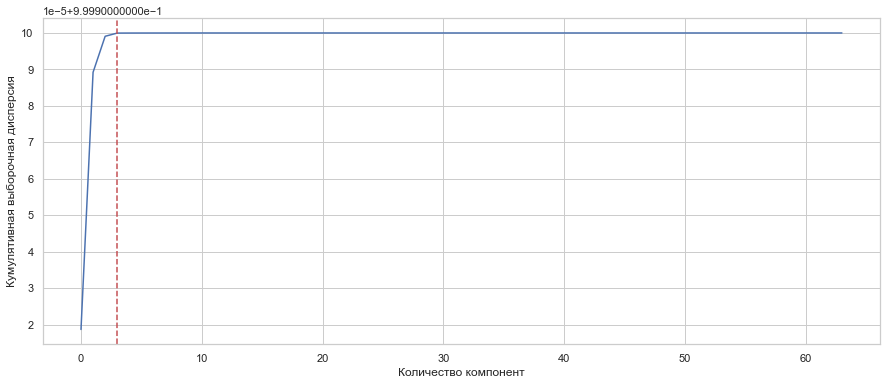

In [280]:
plt.figure(figsize=(15,6))
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная выборочная дисперсия')
plt.axvline(color='r', linestyle = '--', x=3, ymin=0, ymax=1)
plt.show()

Всего лишь 2 компоненты позволяет объяснить практически 100% дисперсии, а 3 - все 100%. Если выбрать по важности переменные обучения дерева решений, то это - "день месяца", "площадь", "температура воздуха".

Эмпирическим путём оставим признаки:

    day_of_month
    square
    temp
    spring
    pressure
    counter_0, counter_1, counter_2, counter_3

#### 1.3.3 Исключение признаков

Для восстановления информации по объекту, используя его obj_id, вынесем obj_id в индекс

In [281]:
train_sampled = train_sampled.set_index(train_sampled.obj_id).drop('obj_id', axis=1)

In [92]:
test_orig = test_orig.set_index(test_orig.obj_id).drop('obj_id', axis=1)

Оставляем только важные фичи

In [282]:
train_sampled = train_sampled[['day_of_month', 'square', 'temp', 'spring', 'pressure', 'counter_0', 'counter_1', 'counter_2', 'counter_3', 'value']]

In [283]:
train_sampled.sample(4)

,day_of_month,square,temp,spring,pressure,counter_0,counter_1,counter_2,counter_3,value
obj_id,,,,,,,,,,
992,25,51483.0,20.0,0,1014.000000,0,1,0,0,140.709000
1074,12,89858.0,-0.6,1,1025.800049,0,1,0,0,0.000000
269,28,809530.0,20.6,1,1009.900024,1,0,0,0,169.889999
646,16,58733.0,8.3,0,1018.599976,1,0,0,0,80.949997


In [94]:
test_orig = test_orig[['day_of_month', 'square', 'temp', 'function_2', 'pressure', 'counter_0', 'counter_1', 'counter_2', 'counter_3']]

In [95]:
test_orig.sample(4)

,day_of_month,square,temp,function_2,pressure,counter_0,counter_1,counter_2,counter_3
obj_id,,,,,,,,,
1424,22,24103.0,-7.2,0,1022.299988,1,0,0,0
1398,31,20291.0,2.8,0,1017.799988,0,1,0,0
1417,24,40451.0,-1.1,0,1023.799988,1,0,0,0
1331,4,171008.0,13.3,0,1018.500000,1,0,0,0


# 2. Создание базового pipeline

Функция загрузки необходимых датасетов

In [96]:
# загружаем из больших датасетов первые 10000 строк
def load_datasets():
    # грузим оригинальный train.csv
    try:
        train_orig = pd.read_csv('train.csv', nrows=10000)
    except FileNotFoundError:
        print('Файл train.csv отсутствует')
    except Exception as e:
        print(f'Возникла ошибка {e.args[1]}')
        
    # грузим оригинальный objects.csv (который building_meta в задании)
    try:
        building_meta_orig = pd.read_csv('objects.csv')
    except FileNotFoundError:
        print('Файл objects.csv отсутствует')
    except Exception as e:
        print(f'Возникла ошибка {e.args[1]}')
        
    # грузим оригинальный weather_train/test.csv
    try:
        weather_train_orig = pd.read_csv('wtrain.csv')
    except FileNotFoundError:
        print('Файл wtrain.csv отсутствует')
    except Exception as e:
        print(f'Возникла ошибка {e.args[1]}')
    try:
        weather_test_orig = pd.read_csv('wtest.csv')
    except FileNotFoundError:
        print('Файл wtest.csv отсутствует')
    except Exception as e:
        print(f'Возникла ошибка {e.args[1]}')
        
    # грузим test.csv
    try:
        test_orig = pd.read_csv('test.csv', nrows=10000)
    except FileNotFoundError:
        print('Файл test.csv отсутствует')
    except Exception as e:
        print(f'Возникла ошибка {e.args[1]}')
        
    return train_orig, building_meta_orig, weather_train_orig, weather_test_orig, test_orig

Функция подготовки train/test

In [99]:
def prepare_train_test(dataset):
    # исправляем тип datetime
    dataset.datetime = pd.to_datetime(dataset.datetime)
    # удалим столбец **Unnamed: 0**
    if 'Unnamed: 0' in dataset.columns:
        dataset = dataset.drop('Unnamed: 0', axis=1)
    # удалим столбец **Unnamed: 0.1**, если он есть
    if 'Unnamed: 0.1' in dataset.columns:
        dataset = dataset.drop('Unnamed: 0.1', axis=1)
    # Сжимаем obj_id и counter
    dataset.obj_id = dataset.obj_id.astype(np.ushort)
    dataset.counter = dataset.counter.astype(np.uint8)
    # жертвуем точностью во имя памяти
    if 'value' in dataset.columns:
        dataset.value = dataset.value.astype(np.float32)
    
    return dataset

Функция подготовки building_meta

In [100]:
def prepare_building_meta(dataset):
    # сжимаем city
    dataset.city = dataset.city.astype(np.uint8)
    # сжимаем obj_id
    dataset.obj_id = dataset.obj_id.astype(np.ushort)
    # удаляем служебную информацию, т.к. дублирует индекс
    dataset = dataset.drop('Unnamed: 0', axis=1)
    # заполняем пропуски
    dataset.year = dataset.year.fillna(0)
    # сжимаем year
    dataset.year = dataset.year.astype(np.ushort)
    # удаляем floor
    dataset = dataset.drop('floor', axis=1)
    
    # словарь кодирования функции здания
    function_values_dict = {
        'Education': 0,
        'Lodging/residential': 1,
        'Office': 2,
        'Entertainment/public assembly': 3,
        'Other': 4,
        'Retail': 5,
        'Parking': 6,
        'Public services': 7,
        'Warehouse/storage': 8,
        'Food sales and service': 9,
        'Religious worship': 10,
        'Healthcare': 11,
        'Utility': 12,
        'Technology/science': 13,
        'Manufacturing/industrial': 14,
        'Services': 15
    }
    # кодируем
    dataset.function = dataset.function.replace(function_values_dict)
    # сжимаем 
    dataset.function = dataset.function.astype(np.uint8)
    # сжимаем площадь
    dataset.square = dataset.square.astype(np.float32)
    
    return dataset

Функция подготовки погодного датасета

In [101]:
def prepare_weather(dataset):    
    # удаляем дубликаты индекса
    if 'Unnamed: 0' in dataset.columns:
        dataset = dataset.drop('Unnamed: 0', axis=1)
    if 'Unnamed: 0.1' in dataset.columns:
        dataset = dataset.drop('Unnamed: 0.1', axis=1)
        
    # задаём верный тип для дата/времени
    dataset.datetime = pd.to_datetime(dataset.datetime)
    
    # словарь подмен пропусков в датасете
    fillna_weather_dict = {'temp': 15.0,
        'dew': 8.3,
        'pressure': 1016.4,
        'wdirection': 190.0,
        'wspeed': 3.1,
        'precipitation': 0,
        'city': 0,
        'clouds': 0.0
    }
    # заполняем Nan
    for col in fillna_weather_dict.keys():
        dataset[col].fillna(fillna_weather_dict[col], inplace=True)
    
    # сжимаем city
    dataset.city = dataset.city.astype(np.uint8)
    # сжимаем clouds
    dataset.clouds = dataset.clouds.astype(np.uint8)
    # для экономии памяти сожмём float64 до float32?
    for col in ['temp', 'dew', 'pressure', 'wdirection', 'wspeed', 'precipitation']:
        dataset[col] = dataset[col].astype(np.float32)
    
    return dataset

Функция объединения датасетов в один

In [138]:
# на входе train/test, building_meta, wtrain, wtest
def join_datasets(dataset, building_meta, wdataset):
    # сцепляем dataset и building_meta, добавив доп.инфо по объектам
    df = pd.merge(dataset, building_meta, how='left', on='obj_id')
    # результативный датасет по dataset+weather
    return pd.merge(df, wdataset, how='left', on=['city', 'datetime'])

Функция удаления выбросов в датасете (применяется для train)

In [104]:
def remove_noise(dataset):
    # количественные столбцы
    num_vars = ['square', 'temp', 'dew', 'precipitation', 'pressure', 'wspeed', 'value']

    for col in num_vars:
        q1 = dataset[col].quantile(0.25)
        q3 = dataset[col].quantile(0.75)

        iqr = q3 - q1

        dataset = dataset[(dataset[col] >= q1 - 1.5 * iqr) & (dataset[col] <= q3 + 1.5 * iqr)]

    return dataset

Функция добавления новых фич

In [105]:
def feature_engineering(dataset):
    # Декатегоризация (только тех, что останутся)
    dataset = pd.get_dummies(dataset, columns=['counter', 'function'])

    # новые признаки
    # день месяца (число)
    dataset['day_of_month'] = dataset.datetime.dt.day

    # новые фичи ужимаем
    # до 1 байта
    dataset.day_of_month = dataset.day_of_month.astype(np.uint8)
    
    return dataset

Для использования в pipeline возьмём модель попроще и побыстрее - линейную регрессию (хотя она для этих данных и не подходит, но качество ведь не оценивается на данном этапе)

In [164]:
from sklearn.linear_model import LinearRegression

### Итоговая pipeline функция

In [286]:
def pipeline():
    # грузим датасеты
    train_orig, building_meta_orig, weather_train_orig, weather_test_orig, test_orig = load_datasets()
    
    # подготавливаем train/test
    train_orig = prepare_train_test(train_orig)
    test_orig = prepare_train_test(test_orig)
    
    # подготавливаем датасет building_meta
    building_meta_orig = prepare_building_meta(building_meta_orig)
    
    # подготавливаем погодные датасеты
    weather_train_orig = prepare_weather(weather_train_orig)
    weather_test_orig = prepare_weather(weather_test_orig)
    
    # объединяем датасеты
    train = join_datasets(train_orig, building_meta_orig, weather_train_orig)
    test = join_datasets(test_orig, building_meta_orig, weather_test_orig)
    
    # удаляем "шум" в train-датасете
    train = remove_noise(train)
    
    # добавляем новые необходимые фичи
    train = feature_engineering(train)
    test = feature_engineering(test)
    
    # выносим obj_id в индекс
    train = train.set_index(train.obj_id).drop('obj_id', axis=1)
    test = test.set_index(test.obj_id).drop('obj_id', axis=1)
    
    # удалить лишние признаки
    train = train[['day_of_month', 'square', 'temp', 'function_2', 'pressure', 'counter_0', 'counter_1', 'counter_2', 'counter_3', 'value']]
    test = test[['day_of_month', 'square', 'temp', 'function_2', 'pressure', 'counter_0', 'counter_1', 'counter_2', 'counter_3']]
    
    # словарь подмен пропусков в датасете
    fillna_dict = {
        'temp': 15.0,
        'pressure': 1016.4,
        'square': 57673.0
    }
    
    # заполняем Nan, если вдруг такие возникли
    for col in fillna_dict.keys():
        train[col].fillna(fillna_dict[col], inplace=True)
        test[col].fillna(fillna_dict[col], inplace=True)
        
    # разбиваем train на X и y (объект-ответ)
    X = train.drop('value', axis=1)
    y = train.value
    
    # Разделяем train на тренировочную и валидационную (зачем это здесь? Но задание есть задание)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    # обучаем модель
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # предсказываем значения
    predict = pd.DataFrame(lr.predict(test))
    
    # сохраняем предсказания
    try:
        predict.to_csv('predict.csv', index=False, header=False)
        print('Предсказания сохранены в файл "predict.csv"')
    except Exception as e:
        print(f'Возникла ошибка сохранения предсказаний: код {e.args[0]} "{e.args[1]}"')

In [287]:
# проверяем
pipeline()

Предсказания сохранены в файл "predict.csv"
